In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src.mcmc import Chain
from src import parse_model_parameter_file
prior_ranges = [
    (0.8,2.5),
    (-15,1.75),
    (-15,1),
    (0.25,0.75),
    (0.001,0.35),
    (-0.8,9),
    (-0.3,0.8),
    (0.2,2.2),
    (0.2,3),
    (0.09,0.25),
    (0,0.2),
    (0.5,40),
    (0.005,0.1),
    (0.01,0.15),
    (0.8,1.2),
] 
PARAMETER_NAMES = [
    r'$\tau_{IC,scale}\;({\rm fm})$',
    r'$a_{h,\eta}$',
    r'$a_{l,\eta}$',
    r'$\epsilon_{\rm sw}\;({\rm GeV/fm^3})$',
    r'$(\eta/s)_{\rm min}$',
    r'$a_{\mu_B}$', #etsscale_mub
    r'$b_{\mu_B}$',#etasshiftmub
    r'$R_{\perp}$',
    r'$R_{\eta}$',
    r'$T_{\eta, \rm 0}\;({\rm GeV})$',
    r'$(\zeta/s)_{\rm 0}$',
    r'$(\epsilon)_{\zeta,\rm 0 }\;({\rm GeV/fm^3})$',
    r'$\sigma_{\zeta, \rm -}\;({\rm GeV})$',
    r'$\sigma_{\zeta, \rm +}\;({\rm GeV})$',
    r'$\sigma_{\rm AB, scale}$'
]

log="no_log"
pca="no_pca"
log2="nolog"
pca2="nopca"
setup="allenergies:allsystems:base-star-eta:3.0:nostarptcut_nolog_nopca_PCGP_full"
setup2="allenergies:allsystems:base-star-eta:3.0:nostarptcut"
suff=""
emu="PCGP"
setupb="allenergies:allsystems:base-star-eta:3.5:nostarptcut_nolog_nopca_PCGP_full"
setupb2="allenergies:allsystems:base-star-eta:3.5:nostarptcut"
setupc="allenergies:allsystems:base-star-eta:2.0:nostarptcut_nolog_nopca_PCGP_full"
setupc2="allenergies:allsystems:base-star-eta:2.0:nostarptcut"

def read_pkl_file_chain(PATH_pklfile_chains):
    with open(PATH_pklfile_chains, 'rb') as pf:
        data = pickle.load(pf)
    
    chain = data['chain']
    #print(data['log_likelihood'])
    print(chain.shape)
    n_walkers = chain.shape[0]
    n_parameters = chain.shape[1]

    return n_walkers, n_parameters, data['chain']

#loading the chain file
#TODO WHAT IS THIS PARAMETERS??
dNcencut = 7  
vncencut = 6

nameStr = "Name"
#nwalkers, nsteps, ndim, chain_pkl = read_pkl_file_chain(path.join("mcmc", "chain.pkl"))[3]
file_path_mcmc=path.join("/home/niklas/Desktop/lustre/good_bayes/inference/actual/mcmc_full/"+log+"/"+pca+"/"+emu, "data:"+setup2+"_"+log2+"_"+pca2+"_"+emu+"_full"+suff+".pkl")
nsteps, ndim, chain_pkl = read_pkl_file_chain(file_path_mcmc)
chain = np.nan_to_num(chain_pkl)
file_path_mcmcb=path.join("/home/niklas/Desktop/lustre/good_bayes/inference/actual/mcmc_full/"+log+"/"+pca+"/"+emu, "data:"+setupb2+"_"+log2+"_"+pca2+"_"+emu+"_full"+suff+".pkl")
nstepsb, ndimb, chain_pklb = read_pkl_file_chain(file_path_mcmcb)
chainb = np.nan_to_num(chain_pklb)
file_path_mcmcc=path.join("/home/niklas/Desktop/lustre/good_bayes/inference/actual/mcmc_full/"+log+"/"+pca+"/"+emu, "data:"+setupc2+"_"+log2+"_"+pca2+"_"+emu+"_full"+suff+".pkl")
nstepsc, ndimc, chain_pklc = read_pkl_file_chain(file_path_mcmcc)
chainc = np.nan_to_num(chain_pklc)
# get the posterior parameters
samples = chain.reshape(-1, ndim)
samplesb = chainb.reshape(-1, ndimb)
samplesc = chainc.reshape(-1, ndimc)
# print out the MAP parameters
results = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
              zip(*np.percentile(samples, [16, 50, 84], axis=0)))
resultsb = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
              zip(*np.percentile(samplesb, [16, 50, 84], axis=0)))
resultsc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
              zip(*np.percentile(samplesc, [16, 50, 84], axis=0)))
mapParam = []
for ipar, par in enumerate(list(results)):
    print("%s = %.4f^{+%.4f}_{-%.4f}" % (
        ipar, par[0], par[1], par[2]))
    mapParam.append(par[0])
mapParamb = []
for ipar, par in enumerate(list(resultsb)):
    print("%s = %.4f^{+%.4f}_{-%.4f}" % (
        ipar, par[0], par[1], par[2]))
    mapParamb.append(par[0])
mapParamc = []
for ipar, par in enumerate(list(resultsc)):
    print("%s = %.4f^{+%.4f}_{-%.4f}" % (
        ipar, par[0], par[1], par[2]))
    mapParamc.append(par[0])
# define the relevant mcmc object
exp_path = "/home/niklas/Desktop/lustre/good_bayes/inference/exp/data:"+setup2+".pkl"
exp_pathb = "/home/niklas/Desktop/lustre/good_bayes/inference/exp/data:"+setupb2+".pkl"
exp_pathc = "/home/niklas/Desktop/lustre/good_bayes/inference/exp/data:"+setupc2+".pkl"
model_par = '/home/niklas/Desktop/lustre/good_bayes/inference/training_points/configs/config_AuAu_200_bulk_scan_central.yaml'
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par)
mymcmcb = Chain(expdata_path=exp_pathb, model_parafile=model_par)
mymcmcc = Chain(expdata_path=exp_pathc, model_parafile=model_par)
emuPath=["/home/niklas/Desktop/lustre/good_bayes/inference/actual/emulator_full/"+log+"/"+pca+"/"+emu+"/data:"+setup2+"_"+log2+"_"+pca2+"_"+emu+suff]
emuPathb=["/home/niklas/Desktop/lustre/good_bayes/inference/actual/emulator_full/"+log+"/"+pca+"/"+emu+"/data:"+setupb2+"_"+log2+"_"+pca2+"_"+emu+suff]
emuPathc=["/home/niklas/Desktop/lustre/good_bayes/inference/actual/emulator_full/"+log+"/"+pca+"/"+emu+"/data:"+setupc2+"_"+log2+"_"+pca2+"_"+emu+suff]
mymcmc.loadEmulator(emuPath)
expData = mymcmc._read_in_exp_data_pickle(exp_path)
mymcmcb.loadEmulator(emuPathb)
expDatab = mymcmcb._read_in_exp_data_pickle(exp_pathb)
mymcmcc.loadEmulator(emuPathc)
expDatac = mymcmcc._read_in_exp_data_pickle(exp_pathc)

(70964, 15)
(67722, 15)
(66381, 15)
0 = 1.3405^{+0.2889}_{-0.3019}
1 = -11.7024^{+4.6039}_{-2.2125}
2 = -12.5323^{+7.8258}_{-1.6009}
3 = 0.5029^{+0.1612}_{-0.1668}
4 = 0.2185^{+0.0832}_{-0.0994}
5 = 3.2318^{+3.3766}_{-2.7164}
6 = 0.0373^{+0.3290}_{-0.2110}
7 = 0.6321^{+0.7465}_{-0.3018}
8 = 1.6955^{+0.3611}_{-0.6767}
9 = 0.1313^{+0.0395}_{-0.0267}
10 = 0.0916^{+0.0675}_{-0.0582}
11 = 25.7295^{+10.2582}_{-15.2152}
12 = 0.0589^{+0.0289}_{-0.0344}
13 = 0.0824^{+0.0457}_{-0.0480}
14 = 0.9769^{+0.1451}_{-0.1240}
0 = 2.3424^{+0.1158}_{-0.7965}
1 = -9.6665^{+4.6338}_{-4.0694}
2 = -1.3639^{+1.6340}_{-10.7126}
3 = 0.6191^{+0.0973}_{-0.2103}
4 = 0.2005^{+0.1018}_{-0.1257}
5 = 4.7614^{+3.3265}_{-4.2231}
6 = 0.1296^{+0.4891}_{-0.3158}
7 = 2.0285^{+0.1310}_{-0.7283}
8 = 1.7610^{+0.4827}_{-0.6042}
9 = 0.1414^{+0.0498}_{-0.0365}
10 = 0.1426^{+0.0454}_{-0.0908}
11 = 19.0492^{+14.0994}_{-12.7685}
12 = 0.0463^{+0.0329}_{-0.0279}
13 = 0.0910^{+0.0428}_{-0.0531}
14 = 1.0810^{+0.0878}_{-0.1520}
0 = 1.5810^

In [5]:
rng = np.random.default_rng()
#print(samples.shape)
sampleIdxList = rng.choice(samples.shape[0], 3000, replace=False) #choose 15 random samples for parameter prediction
posteriorSamples = samples[sampleIdxList, :]
#print(posteriorSamples.shape)
postPred = mymcmc._predict(posteriorSamples) #convert the 15 parameters to posterior predictons
postPred = postPred[0].transpose()
nsamples = postPred.shape[1]

sampleIdxListb = rng.choice(samplesb.shape[0], 3000, replace=False) #choose 15 random samples for parameter prediction
posteriorSamplesb = samplesb[sampleIdxListb, :]
postPredb = mymcmcb._predict(posteriorSamplesb) #convert the 15 parameters to posterior predictons
postPredb = postPredb[0].transpose()
nsamplesb = postPredb.shape[1]

sampleIdxListc = rng.choice(samplesc.shape[0], 3000, replace=False) #choose 15 random samples for parameter prediction
posteriorSamplesc = samplesc[sampleIdxListc, :]
postPredc = mymcmcc._predict(posteriorSamplesc) #convert the 15 parameters to posterior predictons
postPredc = postPredc[0].transpose()
nsamplesc = postPredc.shape[1]

/tmp/ipykernel_919885/3306309367.py:37: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kde_vals /= np.trapz(kde_vals, x_vals)  # Normalize the area under the curve
/tmp/ipykernel_919885/3306309367.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kde_vals_b /= np.trapz(kde_vals_b, x_vals_b)  # Normalize the area under the curve
/tmp/ipykernel_919885/3306309367.py:71: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  kde_vals_c /= np.trapz(kde_vals_c, x_vals_c)  # Normalize the area under the curve


[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral
[INFO][_mathtext] Substituting symbol \perp from STIXGeneral


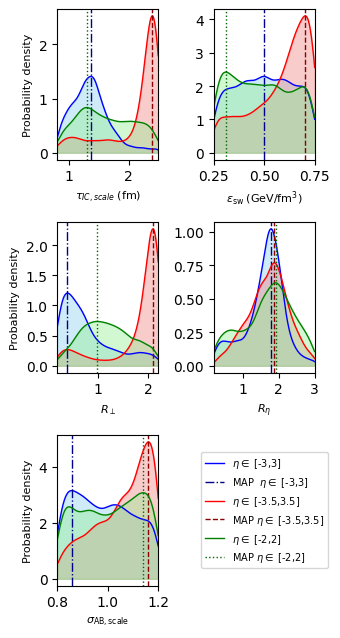

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.gridspec as gridspec

# Assuming posteriorSamples, posteriorSamplesb, posteriorSamplesc, prior_ranges, and PARAMETER_NAMES are already defined

def calculate_map_estimates(posteriorSamples):
    map_estimates = []
    for i in range(posteriorSamples.shape[1]):
        kde = gaussian_kde(posteriorSamples[:, i])
        x_vals = np.linspace(np.min(posteriorSamples[:, i]), np.max(posteriorSamples[:, i]), 1000)
        kde_vals = kde(x_vals)
        mode_idx = np.argmax(kde_vals)
        map_estimates.append(x_vals[mode_idx])
    return map_estimates

def plot_distribution_of_posterior_samples(posteriorSamples, posteriorSamplesb, posteriorSamplesc, mapEstimates, mapEstimatesb, mapEstimatesc):
    fig = plt.figure(figsize=(3.5, 3*3.5/(1.618)))
    gs = gridspec.GridSpec(3, 2, figure=fig)  # Create a 3x2 grid for better control

    # Create subplots for the 5 variables and the last one centered in a new row
    axes = [fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1]),
            fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1]), fig.add_subplot(gs[2, 0])]
    legend_ax = fig.add_subplot(gs[2, 1])  # Empty subplot for the legend
    legend_ax.axis('off')  # Hide the axis for the legend subplot

    count = 0
    for i in [0, 3, 7, 8, 14]:
        ax = axes[count]
        count += 1

        # KDE for smooth distribution for posteriorSamples
        kde = gaussian_kde(posteriorSamples[:, i])
        x_vals = np.linspace(np.min(posteriorSamples[:, i]), np.max(posteriorSamples[:, i]), 1000)
        kde_vals = kde(x_vals)
        kde_vals /= np.trapz(kde_vals, x_vals)  # Normalize the area under the curve

        # Extend the x_vals and kde_vals to touch the y=0 line at both ends
        x_extended = np.concatenate(([prior_ranges[i][0]], x_vals, [prior_ranges[i][1]]))
        kde_extended = np.concatenate(([0], kde_vals, [0]))

        # Plot the smoothed distribution and fill the area under the curve for posteriorSamples
        ax.plot(x_vals, kde_vals, label=r'$\eta \in$ [-3,3]', color='b', lw=1)
        ax.fill_between(x_extended, kde_extended, color='skyblue', alpha=0.4, zorder=1)

        # Plot vertical lines for MAP estimate for posteriorSamples
        ax.axvline(mapEstimates[i], color='darkblue', linestyle='-.', label=r'MAP  $\eta \in$ [-3,3]', lw=1)

        # KDE for smooth distribution for posteriorSamplesb
        kde_b = gaussian_kde(posteriorSamplesb[:, i])
        x_vals_b = np.linspace(np.min(posteriorSamplesb[:, i]), np.max(posteriorSamplesb[:, i]), 1000)
        kde_vals_b = kde_b(x_vals_b)
        kde_vals_b /= np.trapz(kde_vals_b, x_vals_b)  # Normalize the area under the curve

        # Extend the x_vals_b and kde_vals_b to touch the y=0 line at both ends
        x_extended_b = np.concatenate(([prior_ranges[i][0]], x_vals_b, [prior_ranges[i][1]]))
        kde_extended_b = np.concatenate(([0], kde_vals_b, [0]))

        # Plot the smoothed distribution and fill the area under the curve for posteriorSamplesb
        ax.plot(x_vals_b, kde_vals_b, label=r'$\eta \in$ [-3.5,3.5]', color='r', lw=1)
        ax.fill_between(x_extended_b, kde_extended_b, color='lightcoral', alpha=0.4, zorder=1)

        # Plot vertical lines for MAP estimate for posteriorSamplesb
        ax.axvline(mapEstimatesb[i], color='darkred', linestyle='--', label=r'MAP $\eta \in$ [-3.5,3.5]', lw=1)

        # KDE for smooth distribution for posteriorSamplesc
        kde_c = gaussian_kde(posteriorSamplesc[:, i])
        x_vals_c = np.linspace(np.min(posteriorSamplesc[:, i]), np.max(posteriorSamplesc[:, i]), 1000)
        kde_vals_c = kde_c(x_vals_c)
        kde_vals_c /= np.trapz(kde_vals_c, x_vals_c)  # Normalize the area under the curve

        # Extend the x_vals_c and kde_vals_c to touch the y=0 line at both ends
        x_extended_c = np.concatenate(([prior_ranges[i][0]], x_vals_c, [prior_ranges[i][1]]))
        kde_extended_c = np.concatenate(([0], kde_vals_c, [0]))

        # Plot the smoothed distribution and fill the area under the curve for posteriorSamplesc
        ax.plot(x_vals_c, kde_vals_c, label=r'$\eta \in$ [-2,2]', color='g', lw=1)
        ax.fill_between(x_extended_c, kde_extended_c, color='lightgreen', alpha=0.4, zorder=1)

        # Plot vertical lines for MAP estimate for posteriorSamplesc
        ax.axvline(mapEstimatesc[i], color='darkgreen', linestyle=':', label=r'MAP $\eta \in$ [-2,2]', lw=1)

        # Titles, labels and legend
        ax.set_xlabel(PARAMETER_NAMES[i], fontsize=8)
        if count % 2 == 1:
            ax.set_ylabel('Probability density', fontsize=8)
        ax.set_xlim([prior_ranges[i][0], prior_ranges[i][1]])

    # Create the legend in the empty subplot
    handles, labels = ax.get_legend_handles_labels()
    legend_ax.legend(handles, labels, loc='center', fontsize=7)

    plt.tight_layout()

    # Save and show the plot
    plt.savefig("./plots/full/distribution_rapidity_comp.png", dpi=300)
    plt.show()

# Assuming posteriorSamples, posteriorSamplesb, posteriorSamplesc, and PARAMETER_NAMES are already defined
# Calculate MAP estimates
mapEstimates = calculate_map_estimates(posteriorSamples)
mapEstimatesb = calculate_map_estimates(posteriorSamplesb)
mapEstimatesc = calculate_map_estimates(posteriorSamplesc)

# Call the plotting function
plot_distribution_of_posterior_samples(posteriorSamples, posteriorSamplesb, posteriorSamplesc, mapEstimates, mapEstimatesb, mapEstimatesc)

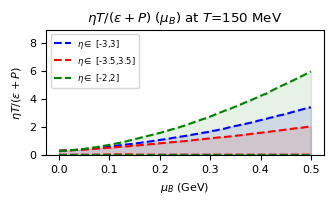

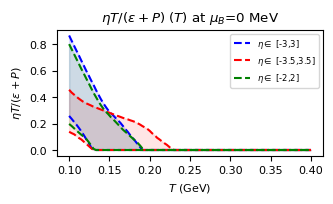

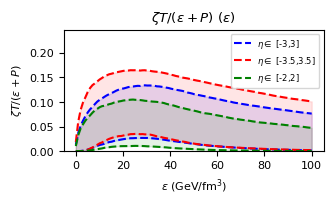

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def shear_viscosity(T, muB, posterior):
    ah = posterior[1]
    al = posterior[2]
    eta_s_min = posterior[4]
    a_mu_B = posterior[5]
    b_mu_B = posterior[6]
    T_eta_0 = posterior[9]

    # Tc (temperature shift due to muB)
    Tc = T_eta_0 + b_mu_B * (muB / 0.938)
    
    # Shear viscosity as a function of T and muB
    eta_s = max(0.0, (eta_s_min + ((T > Tc) * ah * (T - Tc) + (T <= Tc) * al * (T - Tc))) * (1 + a_mu_B * (muB / 0.938)))
    return eta_s

# Bulk viscosity function (zeta/s)
def bulk_viscosity(e, posterior):
    zeta_s_0 = posterior[10]
    epsilon_zeta_0 = posterior[11]
    sigma_zeta_minus = posterior[12]
    sigma_zeta_plus = posterior[13]

    try:
        if e < epsilon_zeta_0:
            result = zeta_s_0 * np.exp(-1.0 * ((0.103 * (e ** 0.25 - epsilon_zeta_0 ** 0.25)) ** 2) / (2.0 * sigma_zeta_minus ** 2))
        else:
            result = zeta_s_0 * np.exp(-1.0 * ((0.103 * (e ** 0.25 - epsilon_zeta_0 ** 0.25)) ** 2) / (2.0 * sigma_zeta_plus ** 2))
        
        # Check for invalid values (e.g., NaN or inf)
        if not np.isfinite(result):
            return 0.0
    except:
        return 0.0

    return result

def generate_viscosity_distributions(posterior_samples, T_values, muB_values, e_values):
    n_samples = posterior_samples.shape[0]
    
    shear_viscosity_T_muB = np.zeros((n_samples, len(muB_values)))
    shear_viscosity_T_muB2 = np.zeros((n_samples, len(T_values)))
    bulk_viscosity_e = np.zeros((n_samples, len(e_values)))

    for i in range(n_samples):
        for j, muB in enumerate(muB_values):
            shear_viscosity_T_muB[i, j] = shear_viscosity(T=0.150, muB=muB, posterior=posterior_samples[i])
        for j, T in enumerate(T_values):
            shear_viscosity_T_muB2[i, j] = shear_viscosity(T=T, muB=0, posterior=posterior_samples[i])
        for j, e in enumerate(e_values):
            bulk_viscosity_e[i, j] = bulk_viscosity(e=e, posterior=posterior_samples[i])

    return shear_viscosity_T_muB, shear_viscosity_T_muB2, bulk_viscosity_e

def calculate_median_estimates(viscosity_samples):
    median_estimates = np.median(viscosity_samples, axis=0)
    return median_estimates

# Function to plot confidence intervals
def plot_confidence_intervals_with_model(x_vals, posterior_values, posterior_values_b, posterior_values_c, ylabel, xlabel, title, name):
    golden_ratio = (1 + np.sqrt(5)) / 2
    width = 3.375  # 3 3/8 inches
    height = width / golden_ratio

    # Set font sizes to 8
    plt.rcParams.update({'font.size': 8})

    # Create the figure with the specified size
    plt.figure(figsize=(width, height))

    lower_60 = np.percentile(posterior_values, 20, axis=0)
    upper_60 = np.percentile(posterior_values, 80, axis=0)
    lower_60_b = np.percentile(posterior_values_b, 20, axis=0)
    upper_60_b = np.percentile(posterior_values_b, 80, axis=0)
    lower_60_c = np.percentile(posterior_values_c, 20, axis=0)
    upper_60_c = np.percentile(posterior_values_c, 80, axis=0)
    
    # Plot the boundaries and connect them to create closed regions
    plt.plot(x_vals, lower_60, color='blue', linestyle='--', label=r'$\eta \in$ [-3,3]')
    plt.plot(x_vals, upper_60, color='blue', linestyle='--')
    plt.fill_between(x_vals, lower_60, upper_60, color='blue', alpha=0.1)

    plt.plot(x_vals, lower_60_b, color='red', linestyle='--', label=r'$\eta \in$ [-3.5,3.5]')
    plt.plot(x_vals, upper_60_b, color='red', linestyle='--')
    plt.fill_between(x_vals, lower_60_b, upper_60_b, color='red', alpha=0.1)

    plt.plot(x_vals, lower_60_c, color='green', linestyle='--', label=r'$\eta \in$ [-2,2]')
    plt.plot(x_vals, upper_60_c, color='green', linestyle='--')
    plt.fill_between(x_vals, lower_60_c, upper_60_c, color='green', alpha=0.1)
    
    plt.xlabel(xlabel, fontsize=8)
    plt.ylabel(ylabel, fontsize=8)
    plt.title(title)
    if name != "etas_T":
        plt.ylim([0, max(np.max(upper_60), np.max(upper_60_b), np.max(upper_60_c)) * 1.5])
    plt.legend(fontsize=6)
    plt.tight_layout()
    plt.savefig(f"./plots/full/{name}_rapidity.png", dpi=300)
    plt.show()

# Generate viscosities for T=150 and muB range, and for muB=0 and T range
muB_values = np.linspace(0, 0.5, 100)
T_values = np.linspace(0.100, 0.400, 100)
e_values = np.linspace(0.1, 100, 100)

# Assuming generate_viscosity_distributions function is defined
shear_viscosity_T_muB, shear_viscosity_T_muB2, bulk_viscosity_e = generate_viscosity_distributions(posteriorSamples, T_values, muB_values, e_values)
shear_viscosity_T_muB_b, shear_viscosity_T_muB2_b, bulk_viscosity_e_b = generate_viscosity_distributions(posteriorSamplesb, T_values, muB_values, e_values)
shear_viscosity_T_muB_c, shear_viscosity_T_muB2_c, bulk_viscosity_e_c = generate_viscosity_distributions(posteriorSamplesc, T_values, muB_values, e_values)

# Calculate MAP estimates
map_shear_viscosity_T_muB = calculate_median_estimates(shear_viscosity_T_muB)
map_shear_viscosity_T_muB2 = calculate_median_estimates(shear_viscosity_T_muB2)
map_bulk_viscosity_e = calculate_median_estimates(bulk_viscosity_e)

map_shear_viscosity_T_muB_b = calculate_median_estimates(shear_viscosity_T_muB_b)
map_shear_viscosity_T_muB2_b = calculate_median_estimates(shear_viscosity_T_muB2_b)
map_bulk_viscosity_e_b = calculate_median_estimates(bulk_viscosity_e_b)

map_shear_viscosity_T_muB_c = calculate_median_estimates(shear_viscosity_T_muB_c)
map_shear_viscosity_T_muB2_c = calculate_median_estimates(shear_viscosity_T_muB2_c)
map_bulk_viscosity_e_c = calculate_median_estimates(bulk_viscosity_e_c)

# Plot confidence intervals for shear viscosity
plot_confidence_intervals_with_model(muB_values, shear_viscosity_T_muB, shear_viscosity_T_muB_b, shear_viscosity_T_muB_c,
                                     ylabel=r'$\eta T/(\epsilon+P)$', xlabel=r'$\mu_B$ (GeV)', 
                                     title=r'$\eta T/(\epsilon+P)$ ($\mu_B$) at $T$=150 MeV', name="etas_mub")

plot_confidence_intervals_with_model(T_values, shear_viscosity_T_muB2, shear_viscosity_T_muB2_b, shear_viscosity_T_muB2_c,
                                     ylabel=r'$\eta T/(\epsilon+P)$', xlabel=r'$T$ (GeV)', 
                                     title=r'$\eta T/(\epsilon+P)$ ($T$) at $\mu_B$=0 MeV', name="etas_T")

# Plot confidence intervals for bulk viscosity
plot_confidence_intervals_with_model(e_values, bulk_viscosity_e, bulk_viscosity_e_b, bulk_viscosity_e_c,
                                     ylabel=r'$\zeta T/(\epsilon+P)$', xlabel=r'$\epsilon$ (GeV/fm$^3$)',
                                     title=r'$\zeta T/(\epsilon+P)$ ($\epsilon$)', name="bulk")